 ##  랜덤 포레스트
 - 랜덤한 결정 트리 (Decision Tree) 를 여러개 묶은 모델
 - 트리 < 데이터 (부트스트램 (* 중복이 될수 있음))

In [1]:
# 119
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.target_names # 오진 분류 classification

array(['malignant', 'benign'], dtype='<U9')

In [4]:
#결정트리 vs 랜덤 포레스트

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

In [13]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
rt = RandomForestClassifier(n_estimators=100).fit(X_test, y_test)

In [14]:
dt.score(X_test, y_test), rt.score(X_test, y_test)

(0.9090909090909091, 1.0)

In [16]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

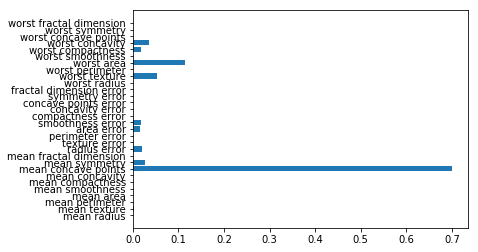

In [20]:
plt.barh(cancer.feature_names, dt.feature_importances_)

#  그라디언트 부스팅 회귀 트리
- 트리 앙상블
- 랜덤 포레스트 : 어러 나무를 서로 다른 데이터로 독립적으로 학습 (병렬 가능)
- Gradient boosting decision tree : 나무 하나씩 순차적으로 학습, 이전 나무의 오류를 최소화하는 방향으로 학습
    - 작은 나무 1~5개
        - 나무가 작다( max_depth 가 작고, leaf 가 적다) - 약한 학습기 (weak learner)

In [21]:
# 122  보통 안정적인 랜덤 포레스트 먼저 사용, 더 성능을 높이고  싶을때  GBoost 사용
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [23]:
gbc.score(X_train, y_train), gbc.score(X_test, y_test) 
# 과적합 > 트리를 작게 만들자 (가지치기)

(1.0, 0.958041958041958)

In [25]:
gbc = GradientBoostingClassifier(random_state=0, max_depth = 1).fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

In [26]:
gbc = GradientBoostingClassifier(random_state=0, max_depth = 2).fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(1.0, 0.972027972027972)

<BarContainer object of 30 artists>

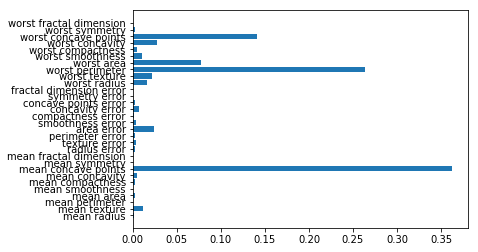

In [27]:
plt.barh(cancer.feature_names, gbc.feature_importances_)

#  131  에이다 부스트 (AdaBoost) : Adaptive Boosting
- 그라디언트 부스트 트리와 비슷
- 차이 : 이전 트리의 오차를 최소화, 이전 트리의 오차샘플에 가중치를 높여서 다음 트리에서 학습

In [32]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(random_state =0).fit(X_train, y_train)
adc.score(X_train, y_train), adc.score(X_test, y_test)

(1.0, 0.9790209790209791)

<BarContainer object of 30 artists>

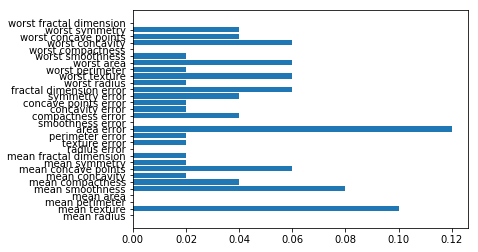

In [33]:
# 특성 중요도
plt.barh(cancer.feature_names, adc.feature_importances_)

- 결정트리 > 과적합 > 앙상블 (랜덤 포레스트, 그라디언트 부스팅 or 에이다부스트)
- 최종결정 : 분류 작업일 경우는 투표(다수결). 예측일 때는 평규니l

- 134 SVN(Support Vector Machine)
- 139 학습 : 데이터 포인트 (샘플) 가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배운다
-  

In [34]:
#  139
from sklearn.svm import SVC, SVR #  SVM-C 분류용 , SVM -R 회규용
import mglearn

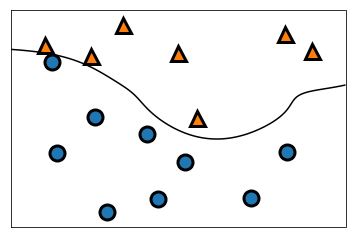

In [41]:
gamma = 1 # 하나의 샘플이 미치는 영향의 위, 작으면 넓은 범위 (많은 샘플: 일반화)
c= 100 # 규제 regularization : 파라미터 값이 작아지도록 규제 (다양한 특징: 일반화)
X, y = mglearn.tools.make_handcrafted_dataset()
svm=  SVC(kernel = 'rbf', C = c, gamma = gamma).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps =.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel()> 0
mglearn.discrete_scatter(sv[:,0], sv[:, 1], sv_labels, s =15, markeredgewidth=3)

In [42]:
sv = SVC(gamma='auto').fit(X_train, y_train)
sv.score(X_train, y_train), sv.score(X_test, y_test)
# 값을 정규화하면 95% 까지 상승, C를 올리면 97%

(1.0, 0.6293706293706294)

In [43]:
# 신경망(neural network) : 다층 퍼셉트론 (multilayer perceptron
import os
os.environ['PATH'] += os.pathsep  + 'C:/Program Files (x86)/Graphviz2.38/bin/'

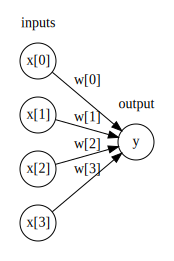

In [44]:
display(mglearn.plots.plot_logistic_regression_graph())

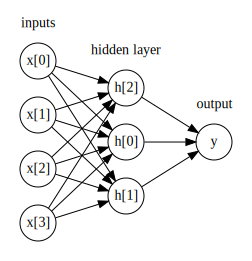

In [45]:
# 신경망(neural network) : 다층 퍼셉트론 (multilayer perceptron
display(mglearn.plots.plot_single_hidden_layer_graph())

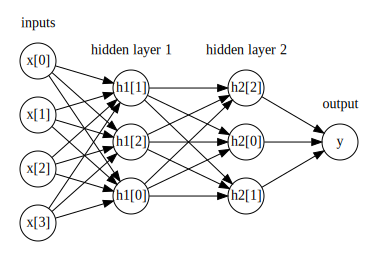

In [49]:
display(mglearn.plots.plot_two_hidden_layer_graph())
# 히든 레이어가 없으면 Linear/Logistic regression
# 히든 레이어가 1~3 면 긴경망 (MP)
# 2000년 이후 히든레이어가 10~100~1000 많아진 모델을 

In [47]:
#151
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp = MLPClassifier().fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test) # 과소적합 : under fitting

(0.931924882629108, 0.9300699300699301)

In [48]:
#히든 레이어2개에 각각 노드 3개씩
mlp = MLPClassifier(hidden_layer_sizes = (100, 50, 29)).fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test)
# 장점 : 모델 형태를 내 마음대로 설계,성능 good
# 단점 : 어떤 형태가 최선인가? 학습, 속도가 느리고, 분석이 까다롭다

(0.9178403755868545, 0.9370629370629371)

KNN(예측/분류), Linear Regression(예측), Logistic Regression(분류)
Decision Tree ( 예측/분류), Random Forest, Gradient Boost Decision Tree, Adaboost
SVM (SVM-C 분류용/ SVM-R 예측용), MLP(뉴럴네트워크)